# Plotting with matplotlib

**Chris Holdgraf**

Thanks to: Christopher Klein, Justin Kitzes, Ariel Rokem, Paul Ivanov

## Extra Dependencies
* Pandas
* Seaborn
* moviepy
* Bokeh

To install these, you can do a quick "conda install pandas" and "conda install seaborn"

## What's the goal of this lecture?

Before we dive in to plotting with python, we should note that the matplotlib library is very complex, and will take you a long time to learn in its entirety (we're still doing this ourselves). 

This lecture is meant to be a taste of the syntax that we generally use when plotting in python (and which we use in python in general). It is also meant to be a brief showing of what matplotlib can do. At the end, we also have some useful links to other plotting libraries that are fancier, but usually more high-level, than matplotlib.

## Getting Started

### What is matplotlib?

Matplotlib is the most popular and mature library for plotting data using
Python. It has all of the functionality you would expect, including the ability to control
the formatting of plots and figures at a very fine level.

The official matplotlib documentation is at http://matplotlib.org/  
The matplotlib gallery is at http://matplotlib.org/gallery.html

### Importing matplotlib

Matplotlib is often used through 'pyplot', which provides a high-level interface for
plotting.  In IPython or the IPython notebook, it's easiest to use the `pylab` magic, which imports matplotlib, numpy, and scipy.

In [1]:
# The inline flag means that images will be shown here in the notebooks, rather
# than in pop-up windows.
%pylab inline

#%pylab  # This would create floating plots

# We'll also use pandas
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Without ipython, you'd need to separately
# import numpy and any other packages you need.

#import matplotlib.pyplot as plt
#import numpy as np
#import scipy as sp

## Creating Figures

There are two major challenges with creating figures. 

1. Understanding the syntax to actually make the basic plot appear. 
2. Second is formatting the basic plot to look exactly how you would like it to look. In general, the formatting will probably take you longer...

In [3]:
# First, let's create some data that we can use for the plotting...
x = np.linspace(0, 2*np.pi)
y1 = np.sin(x)
y2 = np.cos(x)

### Object-oriented vs. function calls
Within pyplot (currently imported as 'plt'), there are two basic ways to go about making
plots:

* using the Matlab-like clone
* using an object-oriented approach.

The latter provides better control over plot features, while only requiring slightly more typing.

For example, I can create a simple plot using two different methods:

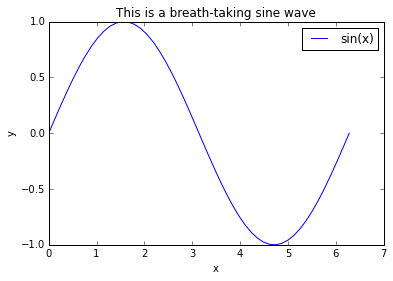

In [4]:
# We can plot this data using a "matlab-style" syntax...
plt.plot(x, y1, label="sin(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title('This is a breath-taking sine wave')

_Note: in order to change the title, I had to call another function called "title".  This assumed that the plot I was referring to was the last one that I created.  But what if I had created multiple plots, and wanted to change an earlier one?_

Using the object-oriented approach allows us to be more specific with our commands...

/Users/choldgraf/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


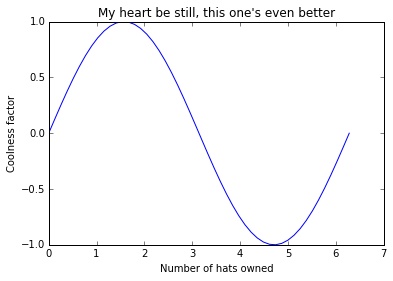

In [5]:
f, ax = plt.subplots()        # we manually make a figure and axis
ax.legend()                   # create a legend for the axis
ax.set_title("Sine Wave")     # we set the title on the axis
ax.plot(x, y1)
ax.set_title("My heart be still, this one's even better")

# We now have access to the "axis" object that we created, 
# which lets us do lots of other cool things with it
ax.set_xlabel("Number of hats owned")
ax.set_ylabel("Coolness factor")


We'll focus on this "object-oriented" plotting method for the rest of the class...

**If you need to get the current active axis:** these commands are useful (``matplotlib`` uses them internally a lot):

    gcf()  # get current figure
    gca()  # get current axis

### A first plot

In simple matplotlib plotting, there are two concepts to distinguish:

- __Figure__ - the entire figure, like what you might see in a journal.  This includes all
subplots, axes, lines, labels, etc. The whole encilada. Another way to think about this is like a _canvas_, upon which you will draw all kinds of different things 
  
- __Subplot/Axes__ - one of the sub-sections of the figure, labeled (a), (b), etc. in
articles. Each subplot will contain one Axes object, which is the container where all of the
useful stuff, such as actual lines, legends, labels, etc., are actually housed.

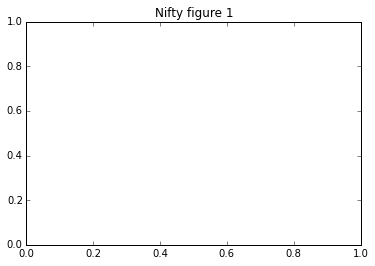

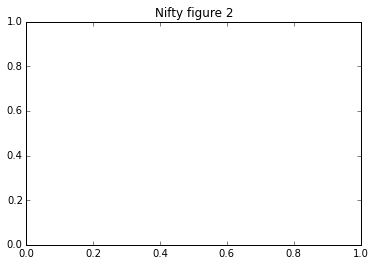

In [6]:
# This function returns one object for the figure
# and one for each axes that you create.
f, ax = plt.subplots()
ax.set_title('Nifty figure 1')

# It is equivalent to:
f = plt.figure()
ax = f.add_subplot(111)
ax.set_title('Nifty figure 2')

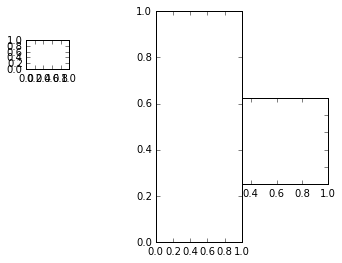

In [7]:
# What happens when we add lots of axes?
f = plt.figure()
a1 = plt.axes([0, 1, .1, .1])
a2 = plt.axes([.4, .6, .3, .3])
a3 = plt.axes([.3, .4, .2, .8])

Note - This can get a little confusing, so try to just use "subplots" or the various matplotlib subplot helpers instead of directly adding axes (until you really have to).

### Controlling layouts
Here's how to make one figure with two subplots, the second of which contains
two lines.  There are many ways to do this, but perhaps the quickest/easiest is to use plt.subplots

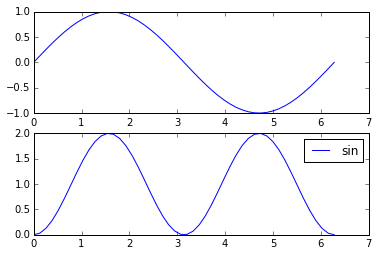

In [8]:
# First, create an empty figure with 2 subplots
# The arguments (1, 2) indicate 1 row and 2 cols
# We are unpacking the two axis objects automatically here
# fig, (ax1, ax2) = plt.subplots(1, 2)

# We could also make this vertical if we wanted:
fig, (ax1, ax2) = plt.subplots(2, 1)


# Next, put one line on the first axis and both lines on the second axis
# - On the second axes, add a legend to distinguish the two lines
ax1.plot(x, y1)

# Notice that I can assign the output of "plot" to a variable.
# This is the "line object" referring to the line we just drew.
l1 = ax2.plot(x, 2*y1**2, label='sin')  # The labels are what appear in the legend
ax2.legend()

# We could also make this vertical if we wanted:

# Finally, save the figure as a png file
fig.savefig('myfig.png')

### More fine-grained control
And finally, an arbitrarily complex grid can be made with ``subplot2grid``:

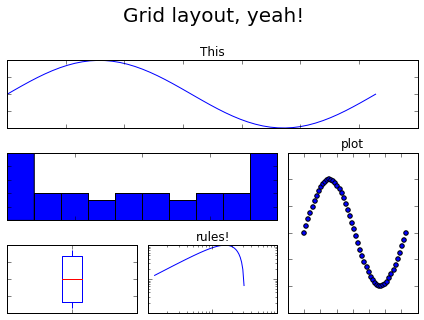

In [9]:
# NOTE: You can even make arbitrarily complicated grids with the subplot2grid tool
f = plt.figure()

# subplot2grid(grid_shape, loc_in_grid, rowspan=1, colspan=1)
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2, 0))
ax5 = plt.subplot2grid((3,3), (2, 1))

# Let's turn off visibility of all tick labels here
for ax in f.axes:
    for t in ax.get_xticklabels()+ax.get_yticklabels():
        t.set_visible(False)
        
ax1.plot(x, y1)
ax2.hist(y1)
ax3.scatter(x, y1)
ax4.boxplot(y1)
ax5.loglog(x, y1)

# And add nice titles
ax1.set_title('This')
ax3.set_title('plot')
ax5.set_title('rules!')
f.suptitle('Grid layout, yeah!', fontsize=20, y=1.1)  # 

# Finally, we can space it all out so it's not so cramped
plt.tight_layout()

In [10]:
# We can even save a figure as an SVG file
f.savefig('./my_great_fig.png')

## Sharing an axis
As scientists, we use data a lot, and often this means putting plots side by side for comparison. Matplotlib lets us share an axis between plots so that we don't get confused by the scale.

The simplest way to share axes is to use the ``subplots`` function.  More
fine-grained control can be obtained by individually adding ``subplot``s and adding
"share" calls to those, but in most cases the functionality from ``subplots`` is sufficient:

In [11]:
# Simple data to display in various forms
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

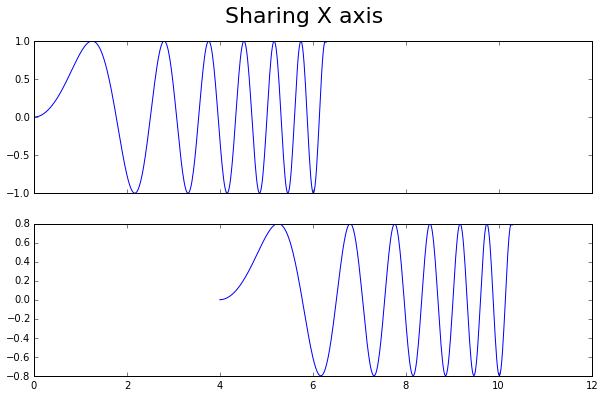

In [12]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True, figsize=(10,6))
f.suptitle("Sharing X axis", fontsize=22)
axarr[0].plot(x, y)
axarr[1].plot(x+4, y*0.8)

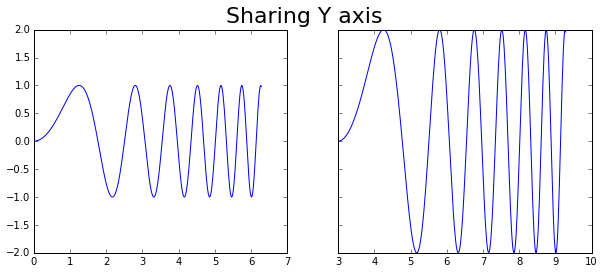

In [13]:
# We can also share the y-axis
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
f.suptitle("Sharing Y axis", fontsize=22)
ax1.plot(x, y)
ax2.plot(x+3, y*2)

(-1.25, 5)

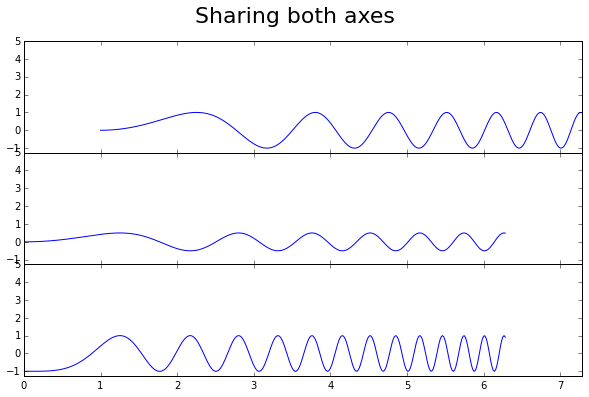

In [14]:
# For the sake of exhaustive completeness, we can also share both
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(10,6))
f.suptitle("Sharing both axes", fontsize=22)

ax1.plot(x+1, y)
ax2.plot(x, y/2)
ax3.plot(x, 2*y**2-1)


# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0) # wspace is for "width-space"

# We'll remove some ugly looking ticks
for ax in f.axes[:-1]:
    plt.setp(ax.get_xticklabels(), visible=False)
    
# Could also use:
# plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)


# Note that changing the limits of one axis propagates to the others
ax1.set_xlim(0,2*np.pi+1)   
ax1.set_ylim(-1.25,5)  

## Customizing a plot's appearance

> Everything is an object.  When we created the above plot, we first created a figure object.  This serves as a container for the axis objects, which themselves are containers for the things we draw inside them.  Those things (e.g., lines, tickmarks, and legends) _are themselves_ objects.  This means we should be able to assign them to variables to do all kinds of interesting things.

In ``matplotlib``, most properties for linestyles, colors, etc, can be set directly in
the call:

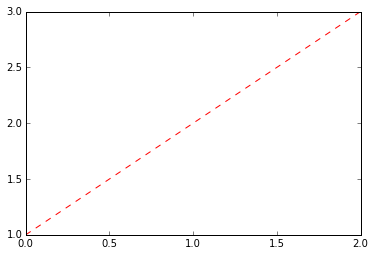

In [15]:
f, ax = plt.subplots()
line = ax.plot([1,2,3], linestyle='--', color='r') # x-values are index array (0 .. N-1)

But for finer control you can get ahold of the returned ``line`` object (more on
these ``matplotlib``-returned objects later):

    In [1]: line, = plt.plot([1,2,3])

These ``line`` objects have a lot of properties you can control, a full list is
seen here by tab-completing in the IPython interpreter:

    In [2]: line.set
    line.set                     line.set_lw
    line.set_aa                  line.set_marker
    line.set_agg_filter          line.set_markeredgecolor
    line.set_alpha               line.set_markeredgewidth
    line.set_animated            line.set_markerfacecolor
    line.set_antialiased         line.set_markerfacecoloralt
    line.set_axes                line.set_markersize
    line.set_c                   line.set_markevery
    line.set_clip_box            line.set_mec
    line.set_clip_on             line.set_mew
    line.set_clip_path           line.set_mfc
    line.set_color               line.set_mfcalt
    line.set_contains            line.set_ms
    line.set_dash_capstyle       line.set_picker
    line.set_dash_joinstyle      line.set_pickradius
    line.set_dashes              line.set_rasterized
    line.set_data                line.set_snap
    line.set_drawstyle           line.set_solid_capstyle
    line.set_figure              line.set_solid_joinstyle
    line.set_fillstyle           line.set_transform
    line.set_gid                 line.set_url
    line.set_label               line.set_visible
    line.set_linestyle           line.set_xdata
    line.set_linewidth           line.set_ydata
    line.set_lod                 line.set_zorder
    line.set_ls      

Remember, **everything is an object** in python. When we plot a line with `plt.plot`, it returns a `Line` object

<class 'matplotlib.lines.Line2D'>


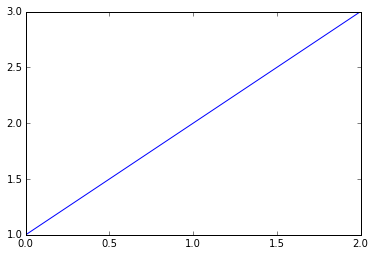

In [19]:
# This creates a list of line objects, one line for each line plotted
line = plt.plot([1,2,3])
print(type(line[0]))

**HINT:** The ``setp`` call (short for set property) can also be very useful for changing properties, especially while working interactively because it contains introspection support, so you can learn about the valid calls as you work:

In [20]:
# This tells us all the things we can change with "line"
plt.setp(line)

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque)         
  animated: [True | False]         
  antialiased or aa: [True | False]         
  axes: an :class:`~matplotlib.axes.Axes` instance         
  clip_box: a :class:`matplotlib.transforms.Bbox` instance         
  clip_on: [True | False]         
  clip_path: [ (:class:`~matplotlib.path.Path`,         :class:`~matplotlib.transforms.Transform`) |         :class:`~matplotlib.patches.Patch` | None ]         
  color or c: any matplotlib color         
  contains: a callable function         
  dash_capstyle: ['butt' | 'round' | 'projecting']         
  dash_joinstyle: ['miter' | 'round' | 'bevel']         
  dashes: sequence of on/off ink in points         
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' |                   'steps-post']         
  figure: a :class:`matplotlib.figure.Figure` instance         
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none']         
  gid: an 

[None]

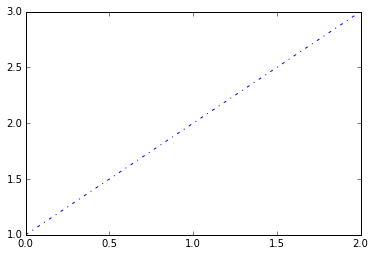

In [21]:
line = plt.plot([1,2,3])
plt.setp(line, linestyle='-.')

Furthermore, ``setp`` can manipulate multiple objects at a time:

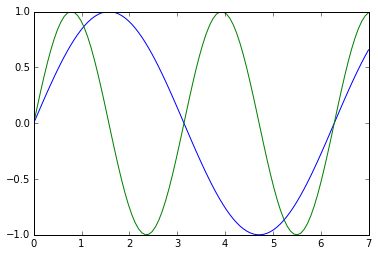

In [22]:
# This creates a list of line objects, one line for each line plotted
f, ax = plt.subplots()
x = linspace(0, 7, 100)
y1 = sin(x)
y2 = sin(2*x)
lines = ax.plot(x, y1, x, y2)

In [23]:
# We will set the width and color of all lines in the figure at once:
plt.setp(lines, linewidth=2, color="r")

[None, None, None, None]

Finally, if you know what properties you want to set on a specific object, a
plain ``set`` call is typically the simplest form:

[None, None, None]

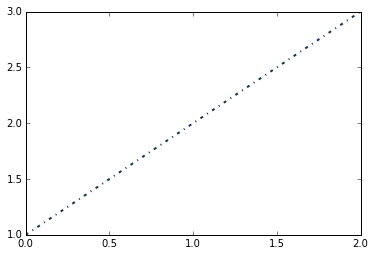

In [24]:
line, = plt.plot([1,2,3])
line.set(lw=2, c=[.1, .2, .3] , ls="-.")

# Or could do this separately:
# line.set_linewidth(2)
# line.set_color('g')
# line.set_linestyle('-.')

# Common plot types

## Error plots

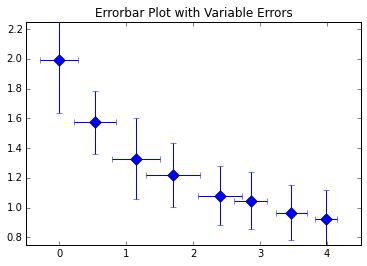

In [25]:
# example data
x = np.linspace(0, 4, 8) + np.random.normal(0.0, 0.05, 8) # throw in some random jitter
y = np.exp(-x) + np.random.normal(0.0, 0.05, 8) + 1

# example variable error bar values
yerr = abs(np.random.normal(0.3, 0.075, y.size))
xerr = abs(np.random.normal(0.2, 0.05, x.size))

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr, yerr, marker="D", ms=8, ls="")
plt.axis([-0.5,4.5,0.75,2.25]) # force plot bounds
plt.title("Errorbar Plot with Variable Errors")

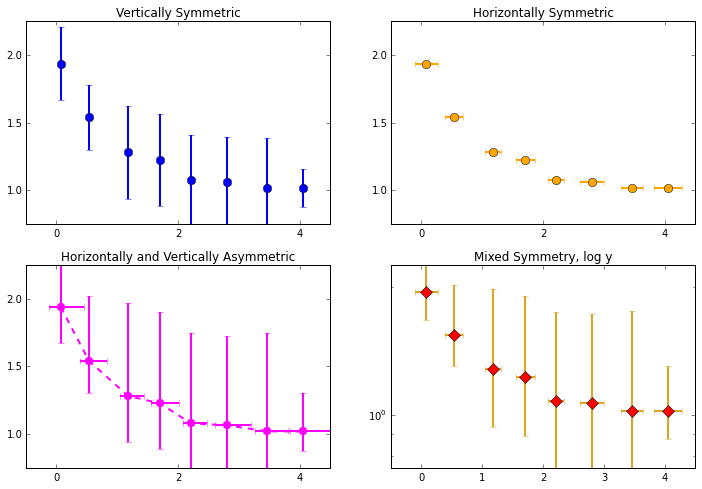

In [26]:
# same data/errors as before
x = np.linspace(0, 4, 8) + np.random.normal(0.0, 0.05, 8)
y = np.exp(-x) + np.random.normal(0.0, 0.05, 8) + 1
yerr = abs(np.random.normal(0.3, 0.075, y.size))
xerr = abs(np.random.normal(0.2, 0.05, x.size))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

ax = axs[0,0] # upper left axis
ax.errorbar(x, y, yerr=yerr, fmt="o", lw=2, ms=8)
ax.set_xlim(-0.5,4.5)
ax.set_ylim(0.75,2.25)
ax.locator_params(nbins=4) # reduce the number of axis ticks to avoid crowding
ax.set_title("Vertically Symmetric")

ax = axs[0,1] # upper right axis
ax.errorbar(x, y, xerr=xerr, fmt="o", color="orange", lw=2, ms=8)
ax.set_xlim(-0.5,4.5)
ax.set_ylim(0.75,2.25)
ax.locator_params(nbins=4)
ax.set_title("Horizontally Symmetric")

ax = axs[1,0] # lower left axis
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt="--o", color="magenta", markeredgecolor="none", lw=2, ms=8)
ax.set_xlim(-0.5,4.5)
ax.set_ylim(0.75,2.25)
ax.locator_params(nbins=4)
ax.set_title("Horizontally and Vertically Asymmetric")

ax = axs[1,1] # lower right axis
ax.set_yscale("log")
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr, fmt="D", lw=2, color="red", ecolor="goldenrod", ms=8)
ax.set_xlim(-0.5,4.5)
ax.set_ylim(0.75,2.25)
ax.set_title("Mixed Symmetry, log y")

## Logarithmic plots

(1.3887943864964021e-11, 10)

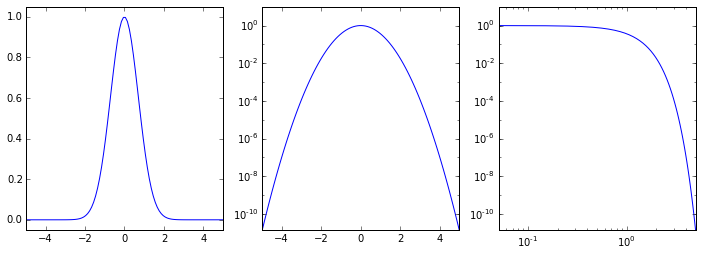

In [27]:
x = np.linspace(-5, 5, 100)
y = np.exp(-x**2)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(x, y)
ax1.set_xlim(-5,5)
ax1.set_ylim(-.05,1.05)

ax2.semilogy(x, y)
ax2.set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e-0])
  # set ticks manually to reduce crowding
ax2.set_xlim(-5,5)
ax2.set_ylim(0,10)

ax3.loglog(x, y) # Note that negative values cannot be plotted
ax3.set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e-0])
ax3.set_xlim(-5,5)
ax3.set_ylim(0,10)

## Bar plots

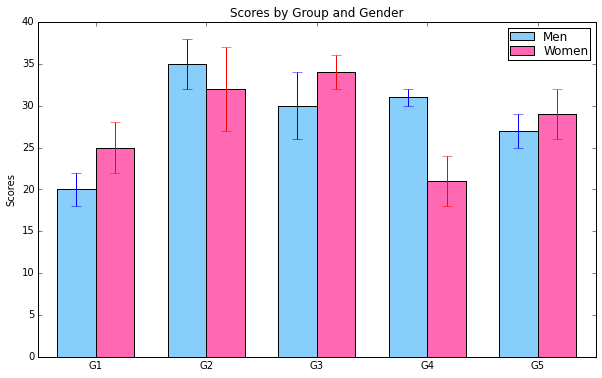

In [28]:
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

menMeans =   (20, 35, 30, 31, 27)
menStd =     (2, 3, 4, 1, 2)
womenMeans = (25, 32, 34, 21, 29)
womenStd =   (3, 5, 2, 3, 3)

ind = np.arange(len(menMeans))  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color="LightSkyBlue", yerr=menStd, ecolor="blue", capsize=5)
rects2 = ax.bar(ind+width, womenMeans, width, color="HotPink", yerr=womenStd, ecolor="red", capsize=5)
ax.set_xlim(ind[0]-width/2, ind[-1]+2.5*width) # To make the plot centered nicely

# add some
ax.set_ylabel("Scores")
ax.set_title("Scores by Group and Gender")
ax.set_xticks(ind+width)
ax.set_xticklabels( ("G1", "G2", "G3", "G4", "G5") )

ax.legend( (rects1[0], rects2[0]), ("Men", "Women"), borderpad=0.2, handlelength=2, labelspacing=0.1 )

## Scatterplots

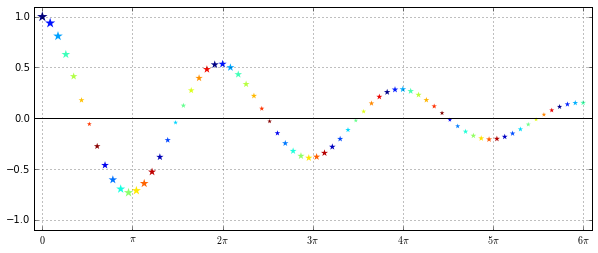

In [29]:
from matplotlib import cm # import the colormappings

t = linspace(0.0, 6*np.pi, 70)
y = exp(-0.1*t)*np.cos(t)
phase = t % 2*np.pi
f = plt.figure(figsize=(10,4))
ax = f.add_subplot(111)
ax.scatter(t, y, marker="*", s=100*abs(y)+20, c=phase, cmap=cm.jet, linewidths=0)
ax.set_ylim(-1.1,1.1)
ax.set_xlim(t[0]-0.3,t[-1]+0.3)
ax.set_xticks(np.pi*linspace(0,6,7))
ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$",r"$3\pi$",r"$4\pi$",r"$5\pi$",r"$6\pi$"])
ax.grid()           # We cover LaTeX string formatting later, but it's this simple
ax.axhline(0, color="k")

## Histograms

[40, 160, 0, 0.03]

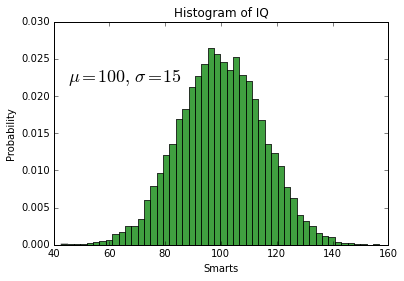

In [30]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, bins=50, normed=1, facecolor="g", alpha=0.75)
# setp(patches[::2], color="r") # Do you remember setp? We can use it here -> X-mas Gaussian
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title("Histogram of IQ")
plt.text(45, .022, r"$\mu=100,\ \sigma=15$", fontsize=18)
plt.axis([40, 160, 0, 0.03])

## Contour plots

<matplotlib.contour.QuadContourSet instance at 0x11610bc68>

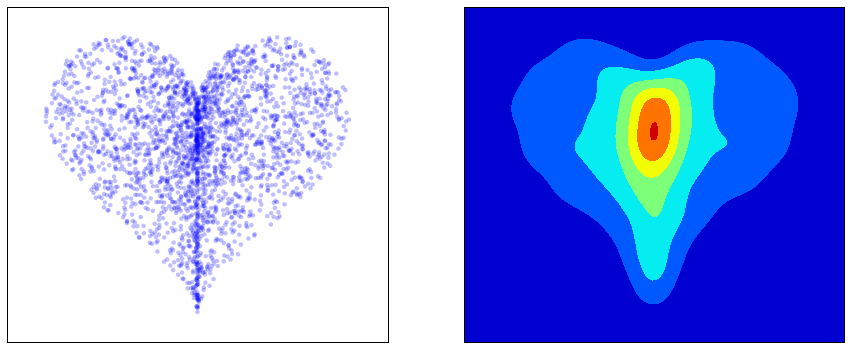

In [31]:
import scipy.stats as stats
from matplotlib import cm

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15,6))

# Create the x and y data points
t = hstack((np.random.normal(-np.pi/2, np.pi/6,  1000), 
            np.random.normal( np.pi/2, np.pi/6,  1000),
            np.random.normal( np.pi*0.7, np.pi/2, 300),
            np.random.normal( np.pi*1.3, np.pi/2, 300),
            np.random.normal( np.pi,     np.pi/2, 100)))
n_points = t.size
radial_scaling = np.random.uniform(0.0,1.0, size=n_points)
x_data = (16*(np.sin(t))**3) * radial_scaling
y_data = (13*np.cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t)) * radial_scaling**0.5

ax1.scatter(x_data, y_data, edgecolor="none", alpha=0.25)
ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 15)
ax1.set_xticks([])
ax1.set_yticks([])

# To make the contour plot we need 2D arrays of coordinates 
# and values ("heights" or "densities"). Could also just use
# a 2D array (like a grayscale image).
rvs = np.append(array([x_data]).T, array([y_data]).T, axis=1)
kde = stats.kde.gaussian_kde(rvs.T)
# Regular grid to evaluate kernal density estimator upon
x_flat = np.r_[-20:20:128j]
y_flat = np.r_[-20:15:128j]
x,y = np.meshgrid(x_flat,y_flat)
grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
# create the smoothed "image" of the density
z = kde(grid_coords.T)
z = z.reshape(128,128)
# Create the contour plot, supply x and y to plot with the same axis units
ax2.contourf(x, y, z, 7, cmap=cm.jet)

Aribitrary text and LaTeX support
=================================

In ``matplotlib``, text can be added either relative to an individual ``axis`` object
or to the whole ``figure``.

These commands add text to the Axes:

- ``ax.set_title()`` - add a title
- ``ax.set_xlabel()`` - add an axis label to the x-axis
- ``ax.set_ylabel()`` - add an axis label to the y-axis
- ``ax.text()`` - add text at an arbitrary location
- ``ax.annotate()`` - add an annotation, with optional arrow

And these act on the whole figure:

- ``plt.figtext()`` - add text at an arbitrary location
- ``fig.suptitle()`` - add a title

And any ``text`` field can contain LaTeX expressions for mathematics, as long as
they are enclosed in ``$`` signs.

Here's how to add text to a plot:

[0, 10, 0, 10]

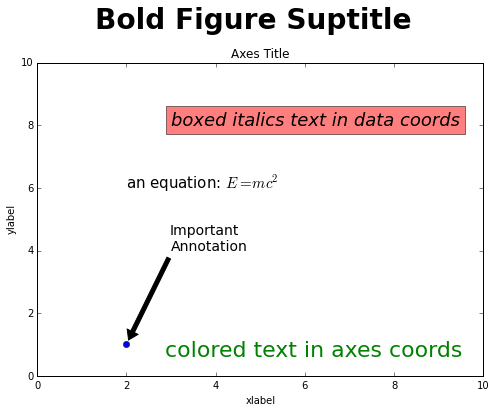

In [36]:
fig = plt.figure(figsize=(8,6))
fig.suptitle("Bold Figure Suptitle", fontsize=28, fontweight="bold")

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title("Axes Title")

ax.set_xlabel("xlabel")
ax.set_ylabel("ylabel")

ax.text(3, 8, "boxed italics text in data coords", style="italic", fontsize=18,
        bbox={"facecolor":"red", "alpha":0.5, "pad":10})

ax.text(2, 6, r"an equation: $E=mc^2$", fontsize=15)

# Commented out because it only works in python 3
# ax.text(3, 2, str(b"unicode: Institut f\374r Festk\366rperphysik"), fontsize=18)

ax.text(0.95, 0.05, "colored text in axes coords",
        verticalalignment="bottom", horizontalalignment="right",
        transform=ax.transAxes,
        color="green", fontsize=22)


ax.plot([2], [1], "o")
ax.annotate("Important\nAnnotation", xy=(2, 1), xytext=(3, 4), fontsize=14,
            arrowprops=dict(facecolor="black", shrink=0.05))

ax.axis([0, 10, 0, 10])

### Plotting images

Matplotlib also makes it easy to plot images. For this, you can use the plot method imshow
(syntax borrowed from Matlab).  _Note that this can be useful for looking at data other than images_

([], <a list of 0 Text yticklabel objects>)

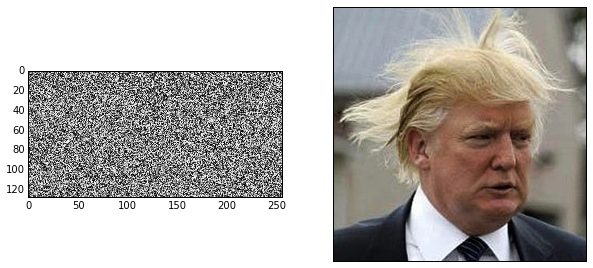

In [37]:
from matplotlib import cm
%matplotlib inline
f, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.random.rand(128, 256), cmap=cm.gray, interpolation='nearest')

img = plt.imread('./data/don.png')
axs[1].imshow(img, origin="upper")
plt.xticks([])
plt.yticks([])

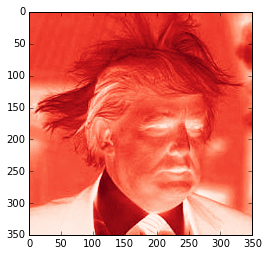

In [38]:
f, ax = plt.subplots()
ax.imshow(img[:, :, 0], cmap=plt.cm.Reds, origin='upper')

# Making prettier plots
Matplotlib is really flexible, but can take a lot of work to get figures looking really good. A few libraries have been created to make this much easier for you (see the beginning of this lecture for some links). Here are a few examples:

## Pandas

In [39]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [40]:
# This will give us a pandas dataframe we can use to plot
# NOTE: This data was scraped from Craigslist using the package "requests"
data = pd.read_csv('./data/bay_area_rentals.csv', index_col=0)
print(data.head())

                     price  loc  size
2015-08-20 09:08:00   1920  eby   707
2015-08-20 09:06:00   1725  eby   NaN
2015-08-20 09:05:00   1895  eby   NaN
2015-08-20 09:05:00   2395  eby   NaN
2015-08-20 09:03:00   1410  eby   642


Pandas has a lot of nice plotting functionality for quickly looking at your data

loc
eby    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
nby    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
sby    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
scz    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
sfc    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
dtype: object

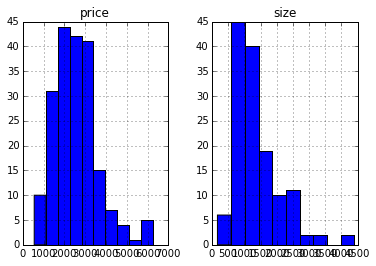

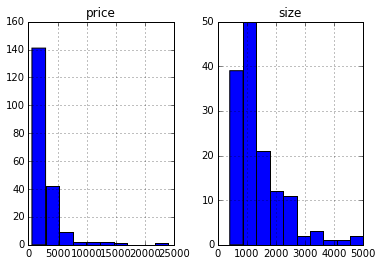

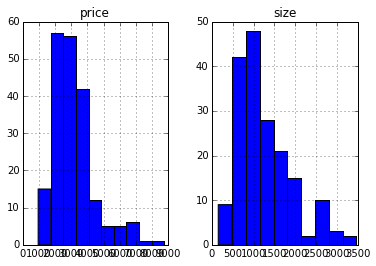

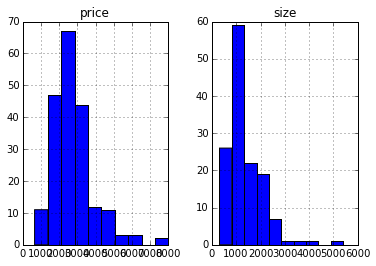

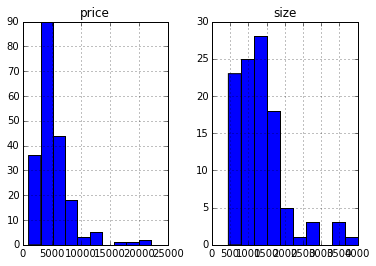

In [41]:
# You can quickly look at distributions of your variables:
# data['size'].hist()
data.groupby('loc').hist()

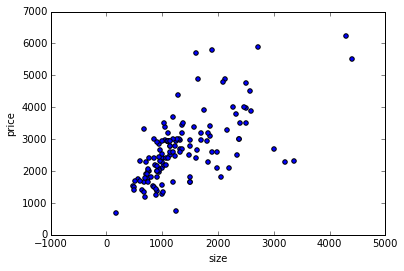

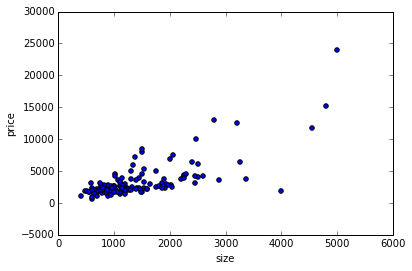

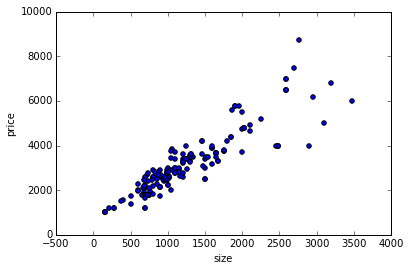

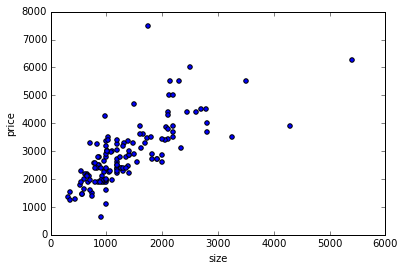

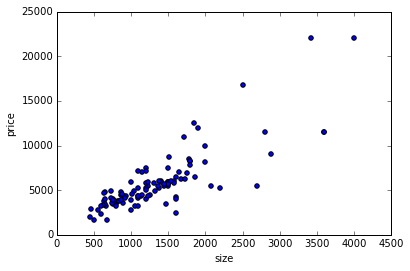

In [42]:
ax = data.groupby('loc').plot('size', 'price', kind='scatter', sharey=True)

## Seaborn

Is a library that does more common statistical comparisons, it utilizes pandas dataframes, and can create some insightful plots very quickly.

In [43]:
import seaborn as sns

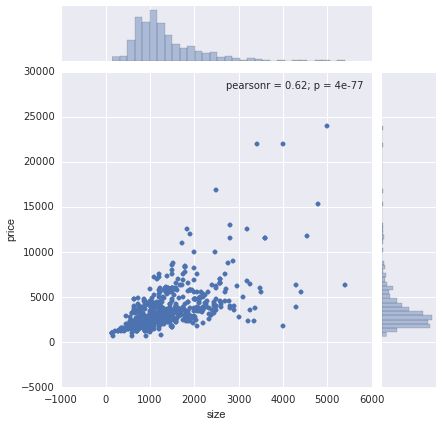

In [44]:
args = ('size', 'price', data)
grd = sns.jointplot(*args, kind='scatter')
# sns.jointplot(*args, kind='kde')

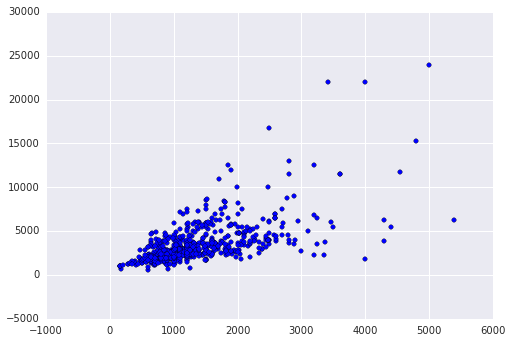

In [45]:
# Note that seaborn also automatically changed our default plotting params
plt.scatter(data['size'], data['price'])

In [46]:
# Which we can reset with this
# sns.reset_orig()

In [47]:
# You can also set colors and other style options with seaborn
sns.set_style('whitegrid')
sns.set_palette(sns.palettes.SEABORN_PALETTES['bright'])

A lot of seaborn's functionality lies in the assumption that there are certain kinds of visualizations that you'll use more likely than others. For example:

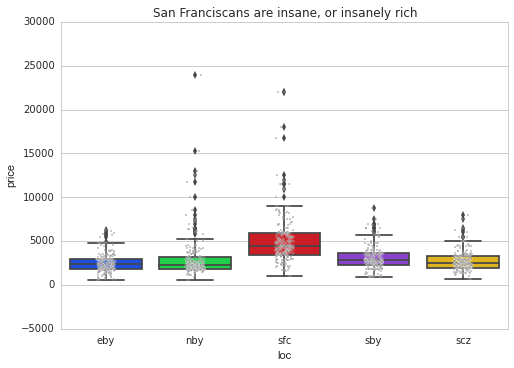

In [48]:
# You can also make pretty boxplots etc:
args = ('loc', 'price', None, data)
f, ax = plt.subplots()
sns.boxplot(*args, ax=ax)
# sns.violinplot(*args, ax=ax)
sns.stripplot(*args, jitter=True, color='k', alpha=.4, size=2, ax=ax)
ax.set_title("San Franciscans are insane, or insanely rich")

Or maybe a KDE plot to compare distributions on top of one another

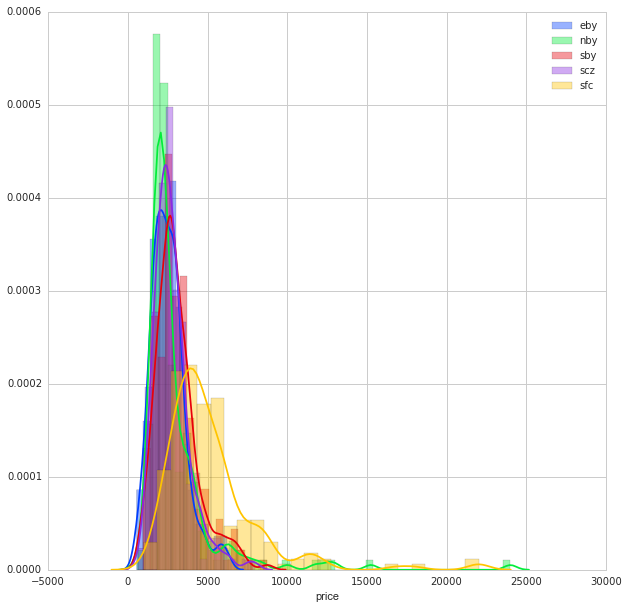

In [49]:
f, ax = plt.subplots(figsize=(10, 10))
for city, vals in data.groupby('loc'):
    sns.distplot(vals['price'].dropna(), label=city)
ax.legend()

Now, we can start to make more direct comparisons between the relationship of price and size for each city

In [50]:
import numpy as np

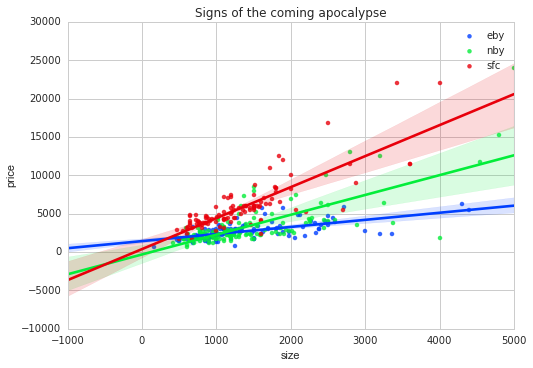

In [51]:
f, ax = plt.subplots()
for city, vals in data.query('loc in ["eby", "sfc", "nby"]').groupby('loc'):
    sns.regplot('size', 'price', data=vals, label=city, ax=ax)
ax.legend()
ax.set_title('Signs of the coming apocalypse')

As with matplotlib, the best way to learn about seaborn is to use their gallery for inspiration:

* [Seaborn Gallery](http://web.stanford.edu/~mwaskom/software/seaborn/examples/index.html)

## ggplot

Yup, ggplot exists in python too. YHat is spearheading the efforts to port over as much functionality, and it pretty much works the same way that the R version does (with a bit less functionality as of the last time that I tried it). Check out their website for examples etc here:

http://ggplot.yhathq.com/

## Bokeh
For those of you who are interested in more interactive plots, Bokeh is a great and beautiful option. It's a little bit different in syntax and style than matplotlib is, but it's linked to the D3 visualization library, so it can create very nice plots very quickly. E.g.:

In [188]:
import numpy as np

from bokeh.plotting import figure, output_file, show

# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

# output to static HTML file (with CDN resources)
output_file("color_scatter.html", title="color_scatter.py example", mode="cdn")

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0,100), y_range=(0,100))

# add a circle renderer with vecorized colors and sizes
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)

## Movies
Finally, you can also make movies pretty easily. There are a few methods, but this is the easiest I've found:

In [52]:
import pandas as pd
import numpy as np
from skimage import filter as flt
%pylab inline

In [53]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

In [54]:
# Create data, then smooth it in both directions so it's purdy
data = pd.DataFrame(np.random.randn(500, 100))
data = data.apply(pd.stats.moments.rolling_mean, args=(50,)).dropna()
data = data.apply(pd.stats.moments.rolling_mean, args=(5,), axis=1).dropna(axis=1)

In [55]:
# This updates the line plot with new y-values taken from "data"
def make_animated(t):
    ix = int(t/t_step)
    ax.lines[0].set_ydata(data.iloc[ix, :].values)
    return mplfig_to_npimage(f)

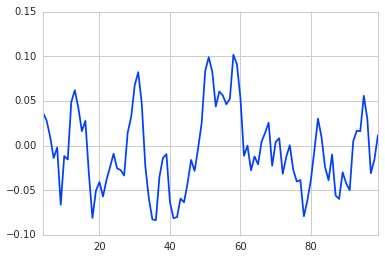

In [57]:
# Initialize the plot
f, ax = plt.subplots()
ax = data.iloc[0].plot(ax=ax)
t_step = .05
length = data.shape[0] * t_step
mov = VideoClip(make_animated, duration=length)

In [58]:
# Build the movie file
mov.ipython_display('./cool.mp4', fps=int(1/t_step))

  warnings.warn(RuntimeWarning(msg))



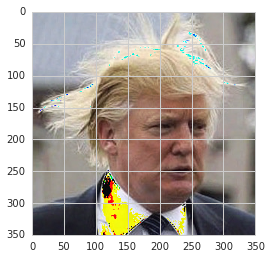

In [59]:
f, ax = plt.subplots()
ax.imshow(img)

perturb = np.random.rand(*img.shape)
def animate_trump(t):
    data = ax.images[0].get_array()
    perturb = np.random.rand(*data.shape) * np.random.rand(3)*.2
    perturb = flt.gaussian_filter(perturb, 2)
    ax.images[0].set_data(data + perturb)
    return mplfig_to_npimage(f)
mov = VideoClip(animate_trump, duration=10)

In [60]:
# Build the movie file
t_step = .1
mov.ipython_display('./cool.mp4', fps=int(1/t_step))

# Neuroscience-specific stuff with MNE-python
Python actually has a lot of support for doing analysis in neuroimaging and with electrophysiology signals. In particular, the MNE-python package is both quickly developing and already highly functional.

They're in the middle of a website redesign right now, but this is a dev version of what's to come.

http://martinos.org/mne/dev/index.html

Here's a link to some cool analyses you can do pretty easily:

http://martinos.org/mne/dev/auto_examples/index.html

Note that MNE is pretty flexible, so even if you don't use EEG/MEG, but you have some kind of electrophysiology signal (like ECoG), you can usually find a lot of use in this package.

# The matplotlib gallery

It can be very intimidating to try to craft exactly the figure that you want, especially if
you are used to being able to adjust things visually using a program like Excel.

If you get stuck and don't know where to start, or just want to learn more about what
matplotlib can do, a great option is to have a look at the matplotlib gallery, which can be
found at http://matplotlib.org/gallery.html. A good way to get started is to find a figure
here that sort of looks like what you want, copy the code, and modify it for your own needs.

# Afterword (and extra links)

Note that this is only the tip of the iceberg for plotting in python.  We've focused on matplotlib, which is the most common/well-developed plotting platform.  However, many others exist that you might be interested in.  Pandas has a lot of useful plotting features, and separate plotting packages are available for more specific data visualization problems (e.g., plotting on a map).

#### Other packages worth looking into:

##### Pretty wrappers around matplotlib
- [Seaborn](http://www.stanford.edu/~mwaskom/software/seaborn/)
- [prettyplotlib](http://olgabot.github.io/prettyplotlib/)
- [pandas](http://pandas.pydata.org/) (plotting libraries within)

##### Alternative (and one day more powerful?) plotting packages
- [ggplot](http://blog.yhathq.com/posts/ggplot-for-python.html) (yes, that ggplot)

- [Bokeh](http://bokeh.pydata.org/)
- [Vincent](http://vincent.readthedocs.org/en/latest/)